## 泰坦尼克数据预测

### 1. read the data and load library

In [1]:
#import libraries for data preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import random as rnd
import matplotlib.pyplot as plt
#import machine learning models ,no need to understand the different classifiers now 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df=pd.read_csv("data\\train.csv")
test_df=pd.read_csv("data\\test.csv")
combine=[train_df,test_df]
print(combine[0].shape)
print(combine[1].shape)

(891, 12)
(418, 11)


In [3]:
#showing columns in the dataset 
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [10]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [12]:
new_features=train_df
new_features['FamilySize']=train_df['Parch']+train_df['SibSp']+1
new_features.FamilySize.nunique()

9

In [13]:
new_features[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [14]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


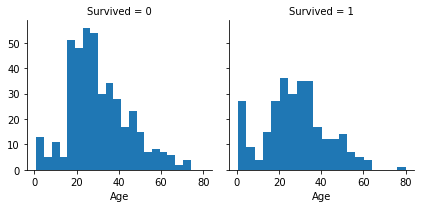

In [15]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist, 'Age', bins=20)

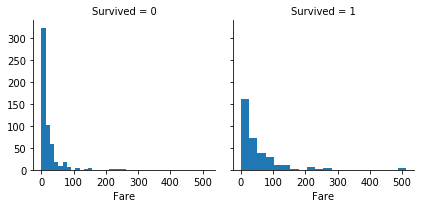

In [16]:
new_features=train_df
new_features.Fare=new_features.Fare.astype(int)
g=sns.FacetGrid(new_features,col='Survived')
g.map(plt.hist, 'Fare', bins=20)

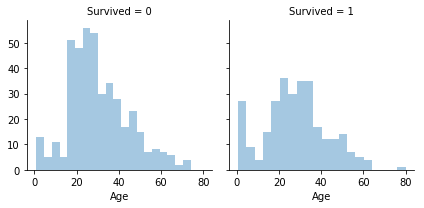

In [17]:
grid=sns.FacetGrid(train_df,col='Survived')
grid.map(sns.distplot,'Age',kde=False,bins=20)

D:\Users\lijia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Users\lijia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


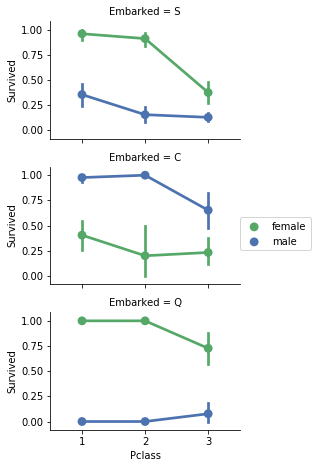

In [18]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

D:\Users\lijia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


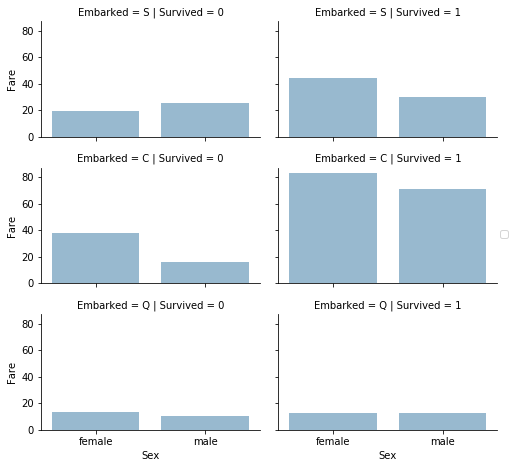

In [19]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [20]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 13) (418, 11) (891, 13) (418, 11)
After (891, 11) (418, 9) (891, 11) (418, 9)


now let us try to extract some indsight from the name ,(whether the person is mr. or ms etc

In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

9


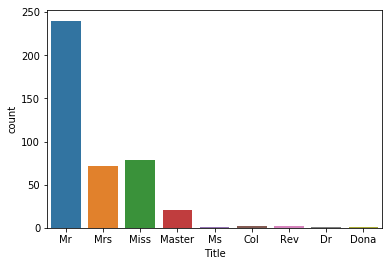

In [22]:
sns.countplot(test_df['Title'])
print(test_df.Title.nunique())

In [23]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [25]:
train_df[['Title', 'Survived']].groupby('Title',as_index=False)[['Survived']].mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53,S,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8,S,1,1


In [27]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 9))

In [28]:
gender_mapping = {"male": 0, "female": 1}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(gender_mapping)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7,S,2,1
1,1,1,1,38.0,1,0,71,C,2,3
2,1,3,1,26.0,0,0,7,S,1,2
3,1,1,1,35.0,1,0,53,S,2,3
4,0,3,0,35.0,0,0,8,S,1,1


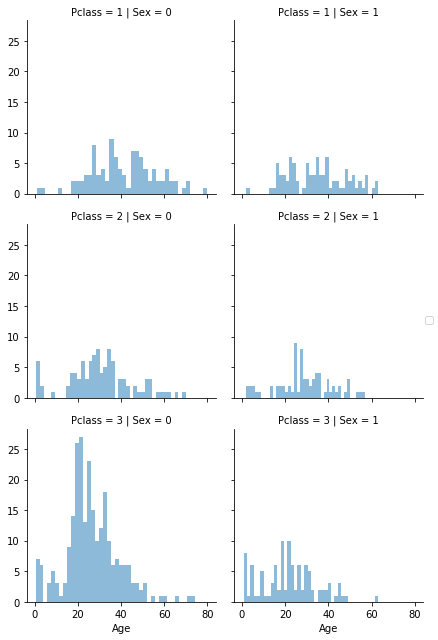

In [29]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', )
grid.map(plt.hist, 'Age', alpha=.5, bins=40)
grid.add_legend()

In [30]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [31]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22,1,0,7,S,2,1
1,1,1,1,38,1,0,71,C,2,3
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,3
4,0,3,0,35,0,0,8,S,1,1


In [32]:
train_df['AgeBand']=pd.cut(train_df['Age'],bins=5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [33]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64) , 'Age'] = 4
test_df.Age.nunique()
print(train_df.shape)
train_df=train_df.drop('AgeBand',axis=1)
#recreate the combine 
combine=[train_df,test_df]

(891, 11)


In [34]:
#create a new feature totalfamilysize 
for dataset in combine: 
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [35]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [36]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7,S,1,0
1,1,1,1,2,71,C,3,0
2,1,3,1,1,7,S,2,1
3,1,1,1,2,53,S,3,0
4,0,3,0,2,8,S,1,1


In [37]:
for dataset in combine:
    dataset['Age*Pclass']=dataset['Age']*dataset['Pclass']
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7,S,1,0,3
1,1,1,1,2,71,C,3,0,2
2,1,3,1,1,7,S,2,1,3
3,1,1,1,2,53,S,3,0,2
4,0,3,0,2,8,S,1,1,6
5,0,3,0,1,8,Q,1,1,3
6,0,1,0,3,51,S,1,1,3
7,0,3,0,0,21,S,4,0,0
8,1,3,1,1,11,S,3,0,3
9,1,2,1,0,30,C,3,0,0


In [38]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7,0,1,0,3
1,1,1,1,2,71,1,3,0,2
2,1,3,1,1,7,0,2,1,3
3,1,1,1,2,53,0,3,0,2
4,0,3,0,2,8,0,1,1,6


In [40]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [42]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [45]:
X_train.info()
Y_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int32
Fare          891 non-null int32
Embarked      891 non-null int32
Title         891 non-null int64
IsAlone       891 non-null int64
Age*Pclass    891 non-null int64
dtypes: int32(3), int64(5)
memory usage: 45.3 KB


0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [46]:
#logistic regression 
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.14

In [47]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.73

In [48]:
maximum=0
idx=1
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
    print(acc_knn)
    if(acc_knn>maximum):
        maximum=acc_knn
        idx=i

84.74
83.39
83.16
84.06
84.18
83.84
84.29
83.5
84.18
83.73
84.18
83.95
83.61
84.06
83.73
83.5
83.05
81.48
82.27
81.93
81.71
80.92
80.7
80.25
80.81
80.47
80.36
79.91
79.69
79.24
79.91
78.56
79.46
78.23
77.89
78.23
77.89
77.89
77.44
76.99
77.1
77.33
77.55
76.88
77.22
77.22
77.1
77.67
77.44


In [49]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.77

In [50]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.09

In [51]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.09

In [52]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [53]:
submission.to_csv('submission.csv', index=False)

In [3]:
import tushare
print(tushare.__version__)

1.2.35


In [2]:
pip install tushare


The following command must be run outside of the IPython shell:

    $ pip install tushare

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [1]:
import tushare as ts
df = ts.realtime_boxoffice()
print(df)

   BoxOffice Irank   MovieName boxPer  \
0    8193.11     1         诛仙Ⅰ  30.83   
1    5474.59     2  名侦探柯南：绀青之拳  20.60   
2    3811.79     3       小小的愿望  14.34   
3    3520.08     4       罗小黑战记  13.25   
4    2436.33     5     哪吒之魔童降世   9.17   
5    1282.26     6  速度与激情：特别行动   4.83   
6    1129.70     7        巨鳄风暴   4.25   
7     166.60     8        烈火英雄   0.63   
8     133.06     9        徒手攀岩   0.50   
9     105.96    10     福星高照朱小八   0.40   
10    321.26    11          其它   1.00   

                                          default_url  \
0   http://images.entgroup.cn/group1/M00/05/1A/wKg...   
1   http://images.entgroup.cn/group1/M00/05/18/wKg...   
2   http://images.entgroup.cn/group2/M00/02/8F/wKg...   
3   http://images.entgroup.cn/group2/M00/02/8F/wKg...   
4   http://images.entgroup.cn/group2/M00/02/8A/wKg...   
5   http://images.entgroup.cn/group2/M00/02/8A/wKg...   
6   http://images.entgroup.cn/group1/M00/05/1C/wKg...   
7   http://images.entgroup.cn/group2/M00/02/8B/wKg.

In [2]:
import tushare as ts
df = ts.day_boxoffice()

In [3]:
df

,AvgPrice,AvpPeoPle,BoxOffice,BoxOffice_Up,IRank,MovieDay,MovieName,SumBoxOffice,WomIndex,default_url,larger_url,moblie_url
0,36,20,8193,-42,1,2,诛仙Ⅰ,22427,,http://images.entgroup.cn/group1/M00/05/1A/wKg...,,http://images.entgroup.cn/group1/M00/05/1A/wKg...
1,31,22,5475,-25,2,2,名侦探柯南：绀青之拳,12893,,http://images.entgroup.cn/group1/M00/05/18/wKg...,,http://images.entgroup.cn/group1/M00/05/18/wKg...
2,37,16,3812,-34,3,3,小小的愿望,12637,,http://images.entgroup.cn/group2/M00/02/8F/wKg...,,http://images.entgroup.cn/group2/M00/02/8F/wKg...
3,33,25,3520,5,4,8,罗小黑战记,20496,,http://images.entgroup.cn/group2/M00/02/8F/wKg...,,http://images.entgroup.cn/group2/M00/02/8F/wKg...
4,34,24,2436,10,5,51,哪吒之魔童降世,488248,,http://images.entgroup.cn/group2/M00/02/8A/wKg...,http://images.entgroup.cn/group2/M00/02/8B/wKg...,http://images.entgroup.cn/group2/M00/02/8A/wKg...
5,37,19,1282,-12,6,23,速度与激情：特别行动,138693,,http://images.entgroup.cn/group2/M00/02/8A/wKg...,http://images.entgroup.cn/group1/M00/05/13/wKg...,http://images.entgroup.cn/group2/M00/02/8A/wKg...
6,32,16,1130,-10,7,3,巨鳄风暴,3894,,http://images.entgroup.cn/group1/M00/05/1C/wKg...,,http://images.entgroup.cn/group1/M00/05/1C/wKg...
7,31,16,167,20,8,45,烈火英雄,168401,,http://images.entgroup.cn/group2/M00/02/8B/wKg...,http://images.entgroup.cn/group2/M00/02/8B/wKg...,http://images.entgroup.cn/group2/M00/02/8B/wKg...
8,42,20,133,34,9,9,徒手攀岩,2997,,http://images.entgroup.cn/group2/M00/02/8A/wKg...,,http://images.entgroup.cn/group2/M00/02/8A/wKg...
9,31,7,106,-49,10,2,福星高照朱小八,411,,http://images.entgroup.cn/group2/M00/02/8A/wKg...,,http://images.entgroup.cn/group2/M00/02/8A/wKg...
